# Classifying Movie Genres

**It IMDB like that sometimes...** This project will focus on determining what the **genre of a given movie** is based on the frequency that each word appears in the original screenplay. We will first use a *k*-Nearest Neighbors classifier.

This project was inspired by UC Berkeley's **Foundations of Data Science Course** (*Data 8*) and an adaptation of the third and final project. All credit goes to the course staff and professors.

In [1]:
import pandas as pd 
import numpy as np
import math

# These lines set up the plotting functionality and formatting.
import seaborn as sns
import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Loading the Dataset: Movies

This project will focus on determining what the **genre of a given movie** is based on the frequency that each word appears in the original screenplay

In [2]:
movies = pd.read_csv('movies.csv')
movies.head(3)

,Title,Genre,Year,Rating,# Votes,# Words,i,the,to,a,...,foster,pub,vegetarian,garrison,grammoo,chimney,bikini,richter,psychopath,fling
0,the terminator,action,1984,8.1,183538,1849,0.040022,0.043807,0.025419,0.024878,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,batman,action,1989,7.6,112731,2836,0.051481,0.033850,0.023977,0.028209,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,tomorrow never dies,action,1997,6.4,47198,4215,0.028707,0.054330,0.030368,0.021827,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000237,0.0


In [3]:
print('Movies in Dataset: ', movies.shape[0])
print('Words in Dataset: ', movies.shape[1]-6) #First 6 columns are not words, but rather movie descriptors

Movies in Dataset:  242
Words in Dataset:  5000


## Implemented Functions

Below I have defined several functions such as `index_by` and `get_movie` that will help me to more efficiently navigate the DataFrame. Additionally, I have set certain global values of `title_index`, which represents a dictionary of all the rows for the most efficient lookup, and `row_count` and `col_count`, which track the number of rows and columns for the original DataFrame.

In [4]:
def index_by(df,column):
    """Return a dict keyed by values in a column that contains series of rows corresponding to each value."""
    d, index = {}, 0

    for title in df[column]:
        if title not in d:
            d[title] = df.iloc[index]
        index += 1
        
    return d

title_index = index_by(movies,'Title')

def get_movie(title):
    """Return a PD series of the given movie using its title"""
    return title_index.get(title)

row_count, col_count = movies.shape

## Splitting the Dataset: Training vs. Test Set

In order for our classifier to be able to predict **unseen data**, we must separate our data into two main groups: the training set and the test set. In this investigation, we will use the training set as the basis of our classifier and we will then use the test set to measure how accurate our classifier is. It is imperative that we do not touch the test set before our final accuracy measurement.

In [5]:
# Number of movies that the training set and test set will have
num_train = int((17/20) * row_count)
num_test = row_count - num_train

#Creating two new DataFrames for individual use with training, testing --> DO NOT TOUCH TEST SET
train = movies[:num_train]
test = movies[num_train:]

## Classifier One: *k*-Nearest Neighbors Classifier

K-Nearest Neighbors (k-NN) is a classification algorithm. Given some numerical attributes (also called features) of an unseen example, it decides whether that example belongs to one or the other of two categories based on its similarity to previously seen examples. Predicting the category of an example is called labeling, and the predicted category is also called a label.

An attribute (feature) we have about each movie is the proportion of times a particular word appears in the movies, and the labels are two movie genres: romance and action. The algorithm requires many previously seen examples for which both the attributes and labels are known: that's the train_movies table.

In [6]:
def plot_with_two_features(test_movie,training_set,x_feature,y_feature):
    """Visualize a k-NN classifier using only two features"""
    test_row = get_movie(test_movie)
    data = {x_feature: [test_row[x_feature]],
            y_feature: [test_row[y_feature]],
            'Genre': ['unknown'],
            'Title': test_movie,
           }
    distances = pd.DataFrame(data=data)
    
    for movie in training_set:
        row = get_movie(movie)
        cleaned_row = row[[x_feature, y_feature, 'Genre','Title']]
        distances = distances.append(cleaned_row, ignore_index=True)
        
    #Plot the scatterplot with the associated features    
    plt.axis([-0.001, 0.002, -0.001, 0.006]);
    sns.scatterplot(x = x_feature, y = y_feature, data = distances, hue = 'Genre', s=75, alpha=0.75)

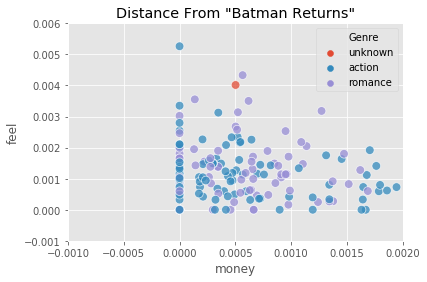

In [7]:
#From this scatterplot, we can see the distances between all movies and 'Batman Returns'

training = train['Title']
plot_with_two_features('batman returns', training, 'money','feel')
plt.title('Distance From "Batman Returns"');

## Computing Distances

*Euclidean distance in two dimensions can be computed using the L2 Norm; generalized from the [**Minkowski Distance**](https://stackoverflow.com/questions/1401712/how-can-the-euclidean-distance-be-calculated-with-numpy) where r = 2 as shown on the provided link. To do so, we can use NumPy's built-in Linear Algebra L2 Norm function to find the Euclidean distance between two points in two dimensions.*

In [8]:
def distance_two_features(title0,title1,x_feature,y_feature):
    """Compute the distance between two movies with titles title0 and title1
    
    Only the features named x_feature and y_feature are used when computing the distance.
    """
    row0, row1 = get_movie(title0), get_movie(title1)
    movie0, movie1 = np.array(row0[[x_feature,y_feature]]), np.array(row1[[x_feature,y_feature]])
    return np.linalg.norm(movie0-movie1)

### Distance Examples: Batman Returns

Below are ten movies and their respective differences from `Batman Returns` with regards to the columns `money` and `feel`.

In [9]:
for movie in train['Title'][:10]:
    movie_distance = distance_two_features('batman returns', movie,'money','feel')
    print(movie, 'distance:\t', movie_distance)

the terminator distance:	 0.0018531387547749904
batman distance:	 0.0028947385758734765
tomorrow never dies distance:	 0.003067195390471237
batman forever distance:	 0.002373242062541873
supergirl distance:	 0.0016736368483252283
the avengers distance:	 0.0029437356216700243
natural born killers distance:	 0.002507080213654921
airplane ii: the sequel distance:	 0.003196621580968414
willow distance:	 0.004047317887707859
fast times at ridgemont high distance:	 0.0025515653909459193


Now, lets iterate through all the movies in the `training set` in order to find the distance that each has from `Batman Returns`. From there, we can take perhaps the **seven closest movies** and look at each `genre` value. Whatever the majority value there is with the seven closest points, that is what our prediction will be for the movie `Batman Returns`.

In [10]:
batman_train = train[['Title','Genre','money','feel']]

distances_from_batman = []

for movie in batman_train['Title']:
    movie_distance = distance_two_features('batman returns', movie,'money','feel')
    distances_from_batman.append(movie_distance)
    
batman_train.insert(4,'Distance From Batman', distances_from_batman)

In [11]:
# Sorted by 'Distance From Batman' in ascending order to find movies closest to Batman
batman_train = batman_train.sort_values('Distance From Batman')[:7]
batman_train

,Title,Genre,money,feel,Distance From Batman
62,the bridges of madison county,romance,0.000565,0.004333,0.000323
204,the fisher king,romance,0.000618,0.003504,0.000525
82,broadcast news,romance,0.000137,0.003553,0.000590
25,hellboy,action,0.000000,0.003350,0.000834
122,as good as it gets,romance,0.000523,0.003139,0.000878
198,spider-man,action,0.000347,0.003126,0.000903
113,harold and maude,romance,0.000000,0.003023,0.001112


In [12]:
def most_common(label,df):
    """Returns the most common element in each column of the DataFrame of the top k"""
    return df.groupby(label).count().iloc[:,:1].sort_index(ascending=False).index[0]

In [13]:
batman_prediction = most_common('Genre',batman_train)
print("Our Prediction for Batman's Genre: " + batman_prediction)

Our Prediction for Batman's Genre: romance


## Batman Returns is...  a Romance Movie?

**Something isn't right**. Even though we used our *k*-Nearest Neighbors classifier on the training set, we were unsuccessful in accurately predicting the classification for a clearly action-packed `Batman Returns`. In order to improve our classifier, we can now look at not distances in two dimensions with respect to two attributes, but rather many dimensional spaces where each word attribute exists as one dimension. If we consider more than two features, we will get better results!

In [14]:
# A list of twenty features that I will use as the basis for my Classifier

features_list_20 = ['power','captain','more','world','run','marri','home',
                    'happi','nice','play','hear','worri','idea','mom','care',
                    'trust','doctor','head','walk','boy']

In [15]:
#Reduced training and testing DataFrames that only include the frequency of each word in the features list
#For each movie within both sets --> raw data

train_20, test_20 = train[features_list_20], test[features_list_20]

In [16]:
test[test['Title']=='king kong']['hear']

211    0.000808
Name: hear, dtype: float64

In [17]:
print('Movie: ')
test[:1][['Title','Genre']]

Movie: 


,Title,Genre
205,the mummy,action


In [18]:
print('Features:')
test_20[:1].head()

Features:


,power,captain,more,world,run,marri,home,happi,nice,play,hear,worri,idea,mom,care,trust,doctor,head,walk,boy
205,0.0,0.0,0.001926,0.000321,0.0,0.000321,0.0,0.0,0.000321,0.000642,0.0,0.0,0.0,0.0,0.000321,0.000321,0.0,0.0,0.000642,0.000321


In [19]:
train_20.head(1)

,power,captain,more,world,run,marri,home,happi,nice,play,hear,worri,idea,mom,care,trust,doctor,head,walk,boy
0,0.000541,0.0,0.002163,0.000541,0.001082,0.0,0.001082,0.0,0.0,0.0,0.000541,0.0,0.0,0.000541,0.000541,0.001082,0.001082,0.0,0.000541,0.0


## Increasing Efficiency of Computing Distances

If we are going to be working with large DataFrames, it would be very inefficient to compute the distance using the `Euclidean Distance Formula`. To solve this, I used matrix manipulations as well as `NumPy` functions scuh as `np.tile` and `np.squeeze` to compute distances quickly.

In [20]:
def fast_distances(test_row, train_df):
    """Return an array of the distances between test_row and each row in train_rows."""

    assert train_df.shape[1] <= 100, "Make sure you're not using all the features of the movies table."
    
    counts_matrix = np.asmatrix(train_df)
    diff = np.tile(np.array(test_row), [counts_matrix.shape[0], 1]) - counts_matrix
    np.random.seed(0) # For tie breaking purposes
    distances = np.squeeze(np.asarray(np.sqrt(np.square(diff).sum(1))))
    eps = np.random.uniform(size=distances.shape)*1e-10 #Noise for tie break
    distances = distances + eps
    
    return distances

In [21]:
#Testing the distances from each movie in the training set to the first movie in the test set
distance_from_first = fast_distances(test_20.iloc[0], train_20)

d = {'Genre': train['Genre'],'Distance': distance_from_first}
genre_distance = pd.DataFrame(data=d).sort_values('Distance')[:7]

# Our Prediction for the FIRST movie in the test set is...
assigned_genre = most_common('Genre',genre_distance)
print('My prediction: ' + assigned_genre)

My prediction: romance


In [22]:
actual_genre = test['Genre'].iloc[0]

print("The predicted genre, {}, was{}correct.".format(
    assigned_genre, " " if actual_genre == assigned_genre else " not "))

The predicted genre, romance, was not correct.


## General Classification Function

The `classify_row` function below will classify a given row into its genre based on the genre of the specified **k-Nearest Neighbors**.

In [26]:
def classify_row(row):
    def classify(test_row, train_set, train_labels, k):
        """Return the most common class among k nearest neigbors to test_row."""
        distances = fast_distances(test_row,train_set)

        d = {'Genre': train_labels,'Distance': distances}

        genre_and_distances = pd.DataFrame(data=d).sort_values('Distance',ascending=True)[:k]
        
        return most_common('Genre',genre_and_distances)
    
    return classify(row,train_20,train['Genre'],3)

Assign `king_kong_genre` to the genre predicted by your classifier for the movie "king kong" in the test set, using **3 neighbors** and using your 20 features.

In [27]:
king_kong_20 = test[test['Title']=='king kong'][features_list_20]

king_kong_genre = classify_row(king_kong_20.iloc[0])
print('King Kong Prediction: ' + king_kong_genre)

King Kong Prediction: action


## Accuracy Check for Classifier

The below cell will iterate through all the movies in the `test_20` DataFrame and assigned them with a classified `genre`.

In [28]:
test_guesses, num_test = [], test_20.shape[0]

for index in range(num_test):
    one_guess = classify_row(test_20.iloc[index])
    test_guesses.append(one_guess)

proportion_correct = sum(test['Genre'] == test_guesses) / len(test['Genre'])
print('Classifier Accuracy with k=3: {}'.format(proportion_correct))

Classifier Accuracy with k=3: 0.5945945945945946
